## **Inicio**

In [2]:
import numpy as np
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('wine-clustering.csv', sep=',', encoding='iso-8859-1')

In [5]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**Alcohol – Álcool**
Refere-se ao teor de álcool no vinho. Normalmente, é medido em porcentagem.

**Malic acid – Ácido málico**
Um ácido orgânico que contribui para a acidez e o sabor do vinho, comum em frutas como a maçã.

**Ash – Cinzas**
Refere-se ao resíduo mineral deixado após a queima do vinho. Indica o conteúdo mineral total.

**Alcalinity of ash – Alcalinidade das cinzas**
Mede a capacidade das cinzas de neutralizar ácidos, relacionada ao conteúdo mineral e à estrutura do vinho.

**Magnesium – Magnésio**
Um mineral importante para o sabor e a estabilidade do vinho.

**Total phenols – Fenóis totais**
Compostos que afetam o sabor, cor e textura do vinho, além de suas propriedades antioxidantes.

**Flavanoids – Flavonoides**
Subgrupo de fenóis que contribuem para a cor, o sabor e as propriedades antioxidantes do vinho.

**Nonflavanoid phenols – Fenóis não flavonoides**
Fenóis que não são flavonoides e afetam a estrutura e a estabilidade do vinho.

**Proanthocyanins – Proantocianidinas**
Compostos que influenciam o sabor adstringente e a cor do vinho, frequentemente encontrados em cascas de uva.

**Color intensity – Intensidade da cor**
Mede a profundidade da cor do vinho, associada à concentração de compostos colorantes.

**Hue – Matiz**
Refere-se à tonalidade da cor do vinho, variando de vermelho a amarelo, indicando o estágio de envelhecimento.

**OD280/OD315 of diluted wines – OD280/OD315 de vinhos diluídos**
Mede a absorção de luz ultravioleta a diferentes comprimentos de onda, o que pode indicar a concentração de compostos fenólicos.

**Proline – Prolina**
Um aminoácido presente no vinho que pode influenciar o sabor e a percepção do corpo do vinho.

In [6]:
import plotly.express as px

In [7]:
hist =  px.histogram (df,  x = "Alcohol", nbins=60)
hist.update_layout(width=600,height=400,title_text='Nível de alcool')
hist.show()

In [8]:
df['Ash'].value_counts()

Ash
2.30    7
2.28    7
2.70    6
2.32    6
2.36    6
       ..
2.16    1
2.53    1
1.75    1
1.71    1
2.37    1
Name: count, Length: 79, dtype: int64

In [9]:
df.shape

(178, 13)

## **Exploração e Tratamento de dados**

**Alterando nomes das colunas**

In [10]:
df.head(2)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [11]:
df.rename(columns={'Alcohol': 'Álcool'}, inplace=True)
df.rename(columns={'Malic_Acid': 'Ácido málico'}, inplace=True)
df.rename(columns={'Ash': 'Cinzas'}, inplace=True)
df.rename(columns={'Ash_Alcanity': 'Alcalinidade das cinzas'}, inplace=True)
df.rename(columns={'Magnesium': 'Magnésio'}, inplace=True)
df.rename(columns={'Total_Phenols': 'Fenóis totais'}, inplace=True)
df.rename(columns={'Flavanoids': 'Flavonoides'}, inplace=True)
df.rename(columns={'Nonflavanoid_Phenols': 'Fenóis não flavonoides'}, inplace=True)
df.rename(columns={'Proanthocyanins': 'Proantocianidinas'}, inplace=True)
df.rename(columns={'Color_Intensity': 'Intensidade da cor'}, inplace=True)
df.rename(columns={'Hue': 'Matriz'}, inplace=True)
df.rename(columns={'Proline': 'Prolina'}, inplace=True)


In [12]:
df.head(3)

,Álcool,Ácido málico,Cinzas,Alcalinidade das cinzas,Magnésio,Fenóis totais,Flavonoides,Fenóis não flavonoides,Proantocianidinas,Intensidade da cor,Matriz,OD280,Prolina
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


**Valores Missing (NAN)**

In [13]:
# RELAÇÃO DA QUANTIDADE
df.isnull().sum()

Álcool                     0
Ácido málico               0
Cinzas                     0
Alcalinidade das cinzas    0
Magnésio                   0
Fenóis totais              0
Flavonoides                0
Fenóis não flavonoides     0
Proantocianidinas          0
Intensidade da cor         0
Matriz                     0
OD280                      0
Prolina                    0
dtype: int64

In [14]:
df.dtypes

Álcool                     float64
Ácido málico               float64
Cinzas                     float64
Alcalinidade das cinzas    float64
Magnésio                     int64
Fenóis totais              float64
Flavonoides                float64
Fenóis não flavonoides     float64
Proantocianidinas          float64
Intensidade da cor         float64
Matriz                     float64
OD280                      float64
Prolina                      int64
dtype: object

**Dados Estatísticos**

In [15]:
df.describe()

,Álcool,Ácido málico,Cinzas,Alcalinidade das cinzas,Magnésio,Fenóis totais,Flavonoides,Fenóis não flavonoides,Proantocianidinas,Intensidade da cor,Matriz,OD280,Prolina
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


**Análise dos outliers**

In [16]:
import plotly.express as px

In [17]:
boxplot = px.box(df, y="Cinzas")
boxplot.show()

## **Pré-processamento**

**Escalonamento**

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
df2 = pd.DataFrame(df)

In [20]:
df2

,Álcool,Ácido málico,Cinzas,Alcalinidade das cinzas,Magnésio,Fenóis totais,Flavonoides,Fenóis não flavonoides,Proantocianidinas,Intensidade da cor,Matriz,OD280,Prolina
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [21]:
escala = StandardScaler()
df2_esc = escala.fit_transform(df2)

In [22]:
df2_esc

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## **Algoritmos**

### **K-means Com Dois Atributos**

In [23]:
df2

,Álcool,Ácido málico,Cinzas,Alcalinidade das cinzas,Magnésio,Fenóis totais,Flavonoides,Fenóis não flavonoides,Proantocianidinas,Intensidade da cor,Matriz,OD280,Prolina
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [24]:
dados = df2.iloc[:, [2,3]].values

In [25]:
dados

array([[ 2.43, 15.6 ],
       [ 2.14, 11.2 ],
       [ 2.67, 18.6 ],
       [ 2.5 , 16.8 ],
       [ 2.87, 21.  ],
       [ 2.45, 15.2 ],
       [ 2.45, 14.6 ],
       [ 2.61, 17.6 ],
       [ 2.17, 14.  ],
       [ 2.27, 16.  ],
       [ 2.3 , 18.  ],
       [ 2.32, 16.8 ],
       [ 2.41, 16.  ],
       [ 2.39, 11.4 ],
       [ 2.38, 12.  ],
       [ 2.7 , 17.2 ],
       [ 2.72, 20.  ],
       [ 2.62, 20.  ],
       [ 2.48, 16.5 ],
       [ 2.56, 15.2 ],
       [ 2.28, 16.  ],
       [ 2.65, 18.6 ],
       [ 2.36, 16.6 ],
       [ 2.52, 17.8 ],
       [ 2.61, 20.  ],
       [ 3.22, 25.  ],
       [ 2.62, 16.1 ],
       [ 2.14, 17.  ],
       [ 2.8 , 19.4 ],
       [ 2.21, 16.  ],
       [ 2.7 , 22.5 ],
       [ 2.36, 19.1 ],
       [ 2.36, 17.2 ],
       [ 2.7 , 19.5 ],
       [ 2.65, 19.  ],
       [ 2.41, 20.5 ],
       [ 2.84, 15.5 ],
       [ 2.55, 18.  ],
       [ 2.1 , 15.5 ],
       [ 2.51, 13.2 ],
       [ 2.31, 16.2 ],
       [ 2.12, 18.8 ],
       [ 2.59, 15.  ],
       [ 2.

**Elbow Method**


In [26]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(dados)
    # inertia: Método para gerar o wcss
    wcss.append(kmeans.inertia_)

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

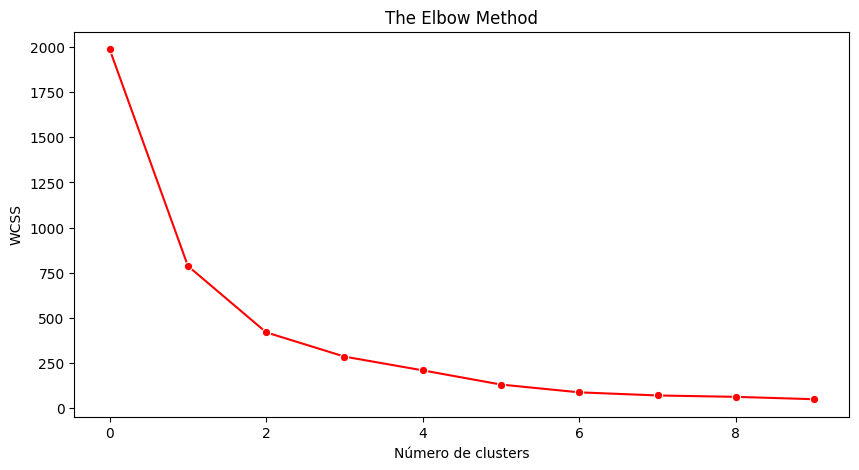

In [28]:
plt.figure(figsize=(10,5))
sns.lineplot(wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

**Agrupamento**

In [29]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 5, max_iter = 300)

In [30]:
kmeans1 = kmeans.fit(dados)

In [31]:
# Coordenadas dos Centróides
centroides = kmeans1.cluster_centers_
centroides

array([[ 2.28306818, 16.87045455],
       [ 2.44811111, 22.06111111]])

In [32]:
# Classificação dos dados
classificacao = kmeans1.labels_
classificacao

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1])

In [33]:
dados[3,:]

array([ 2.5, 16.8])

In [34]:
classificacao[3]

0

In [35]:
import plotly.express as px
import plotly.graph_objects as go

In [36]:
graf1 = px.scatter(x = dados[:,0], y = dados[:,1], color=classificacao)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [15, 15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means')
graf3.update_xaxes(title = 'Rendimento anual (K$)')
graf3.update_yaxes(title = 'Pontuação')
graf3.show()

In [37]:
agrupamento = pd.DataFrame(classificacao, columns = ['Grupo'])
agrupamento

,Grupo
0,0
1,0
2,0
3,0
4,1
...,...
173,1
174,1
175,1
176,1


In [38]:
df3 = pd.concat([df, agrupamento],axis=1)
df3

,Álcool,Ácido málico,Cinzas,Alcalinidade das cinzas,Magnésio,Fenóis totais,Flavonoides,Fenóis não flavonoides,Proantocianidinas,Intensidade da cor,Matriz,OD280,Prolina,Grupo
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


### **K-means Com Todos Atributos**

In [39]:
df2_esc

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [40]:
df2_esc.shape

(178, 13)

**Elbow Method**

In [41]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df2_esc)
# Método inertia para gerar o wcss
    wcss.append(kmeans.inertia_)

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

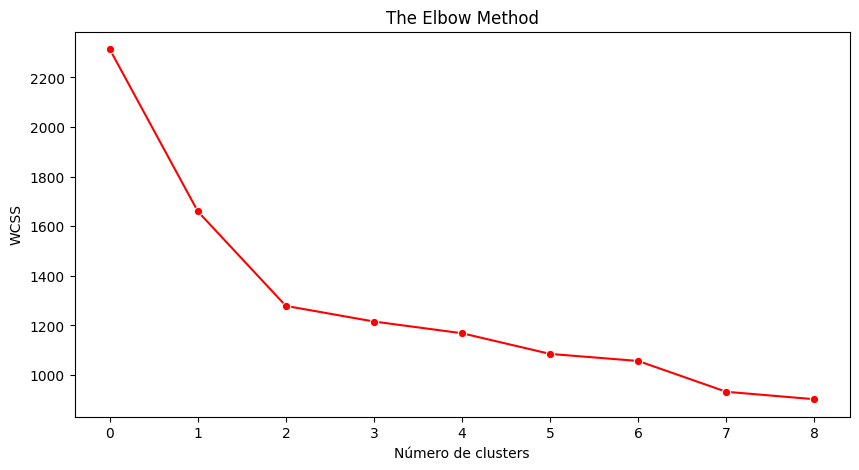

In [43]:
plt.figure(figsize=(10,5))
sns.lineplot(wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

**Agrupamento**

In [302]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 5, max_iter = 300)

In [303]:
kmeans2 = kmeans.fit(df2_esc)

In [304]:
# Coordenadas dos Centróides
centroides = kmeans2.cluster_centers_
centroides

array([[ 0.87809728, -0.30457633,  0.31894179, -0.66452366,  0.56488825,
         0.87650546,  0.94363903, -0.58558981,  0.58178294,  0.16718842,
         0.48372814,  0.76705349,  1.15834713],
       [-0.93900326, -0.39196582, -0.43920097,  0.20898793, -0.46377382,
        -0.05334831,  0.06690377, -0.01982215,  0.06479192, -0.88207529,
         0.45298189,  0.28973833, -0.75602559],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796]])

In [305]:
# Inversão do escalonamento
escala.inverse_transform(kmeans2.cluster_centers_)

array([[1.37114754e+01, 1.99704918e+00, 2.45377049e+00, 1.72819672e+01,
        1.07786885e+02, 2.84213115e+00, 2.96918033e+00, 2.89180328e-01,
        1.92295082e+00, 5.44459016e+00, 1.06770492e+00, 3.15475410e+00,
        1.11063934e+03],
       [1.22404545e+01, 1.89969697e+00, 2.24636364e+00, 2.01909091e+01,
        9.31363636e+01, 2.26181818e+00, 2.09590909e+00, 3.59393939e-01,
        1.62787879e+00, 3.01893939e+00, 1.06069697e+00, 2.81681818e+00,
        5.09484848e+02],
       [1.31341176e+01, 3.30725490e+00, 2.41764706e+00, 2.12411765e+01,
        9.86666667e+01, 1.68392157e+00, 8.18823529e-01, 4.51960784e-01,
        1.14588235e+00, 7.23470586e+00, 6.91960784e-01, 1.69666667e+00,
        6.19058824e+02]])

In [306]:
# Classificação dos dados
classificacao2 = kmeans2.labels_
classificacao2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [49]:
classificacao2[19]

0

In [307]:
agrupamento2 = pd.DataFrame(classificacao2, columns = ['Grupo'])
agrupamento2

,Grupo
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


In [308]:
df4 = pd.concat([df, agrupamento2],axis=1)
df4

,Álcool,Ácido málico,Cinzas,Alcalinidade das cinzas,Magnésio,Fenóis totais,Flavonoides,Fenóis não flavonoides,Proantocianidinas,Intensidade da cor,Matriz,OD280,Prolina,Grupo
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [309]:
df4.iloc[125 , :]

Álcool                      12.07
Ácido málico                 2.16
Cinzas                       2.17
Alcalinidade das cinzas     21.00
Magnésio                    85.00
Fenóis totais                2.60
Flavonoides                  2.65
Fenóis não flavonoides       0.37
Proantocianidinas            1.35
Intensidade da cor           2.76
Matriz                       0.86
OD280                        3.28
Prolina                    378.00
Grupo                        1.00
Name: 125, dtype: float64

In [311]:
grupo0 = df4.loc[df4.Grupo == 2]
grupo0

,Álcool,Ácido málico,Cinzas,Alcalinidade das cinzas,Magnésio,Fenóis totais,Flavonoides,Fenóis não flavonoides,Proantocianidinas,Intensidade da cor,Matriz,OD280,Prolina,Grupo
61,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.750000,0.98,1.59,450,2
83,13.05,3.86,2.32,22.5,85,1.65,1.59,0.61,1.62,4.800000,0.84,2.01,515,2
118,12.77,3.43,1.98,16.0,80,1.63,1.25,0.43,0.83,3.400000,0.70,2.12,372,2
130,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.100000,0.76,1.29,630,2
131,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.400000,0.74,1.42,530,2
132,12.81,2.31,2.40,24.0,98,1.15,1.09,0.27,0.83,5.700000,0.66,1.36,560,2
133,12.70,3.55,2.36,21.5,106,1.70,1.20,0.17,0.84,5.000000,0.78,1.29,600,2
134,12.51,1.24,2.25,17.5,85,2.00,0.58,0.60,1.25,5.450000,0.75,1.51,650,2
135,12.60,2.46,2.20,18.5,94,1.62,0.66,0.63,0.94,7.100000,0.73,1.58,695,2
136,12.25,4.72,2.54,21.0,89,1.38,0.47,0.53,0.80,3.850000,0.75,1.27,720,2


In [312]:
grupo0.shape

(51, 14)

### **K-means Com PCA**

In [55]:
df2_esc

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [56]:
df2_esc.shape

(178, 13)

**Componentes Principais**

In [57]:
from sklearn.decomposition import PCA

In [58]:
pca = PCA(n_components = 2)

In [59]:
df2_pca = pca.fit_transform(df2_esc)

In [60]:
df2_pca

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

In [61]:
# razão das variáveis explicativas
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

In [62]:
# Soma das variáveis explicativas
pca.explained_variance_ratio_.sum()

0.5540633835693531

**Elbow Method**


In [63]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df2_pca)
# Método inertia para gerar o wcss
    wcss.append(kmeans.inertia_)

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

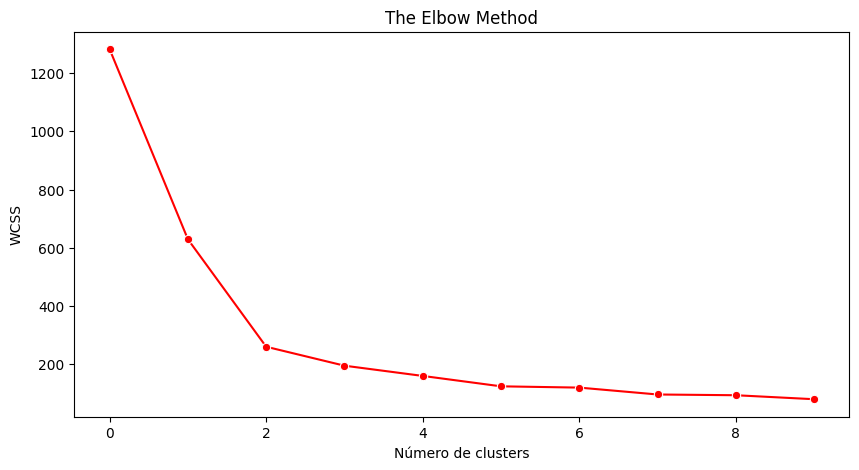

In [65]:
plt.figure(figsize=(10,5))
sns.lineplot(wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

**Agrupamento**

In [66]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 5, max_iter = 300)

In [67]:
kmeans3 = kmeans.fit(df2_pca)

In [68]:
# Coordenadas dos Centróides
centroides = kmeans3.cluster_centers_
centroides

array([[ 2.28888211, -0.95994724],
       [-2.73771147, -1.16476397],
       [-0.04083933,  1.74320866]])

In [69]:
# Classificação dos dados
classificacao3 = kmeans3.labels_
classificacao3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [70]:
import plotly.express as px
import plotly.graph_objects as go

In [71]:
graf1 = px.scatter(x = df2_pca[:,0], y = df2_pca[:,1], color=classificacao3)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [15, 15, 15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means com PCA')
graf3.update_xaxes(title = 'Componente 1')
graf3.update_yaxes(title = 'Componente 2')
graf3.show()

In [72]:
agrupamento3 = pd.DataFrame(classificacao3, columns = ['Grupo'])
agrupamento3

,Grupo
0,0
1,0
2,0
3,0
4,0
...,...
173,1
174,1
175,1
176,1


In [73]:
df5 = pd.concat([df, agrupamento3],axis=1)
df5

,Álcool,Ácido málico,Cinzas,Alcalinidade das cinzas,Magnésio,Fenóis totais,Flavonoides,Fenóis não flavonoides,Proantocianidinas,Intensidade da cor,Matriz,OD280,Prolina,Grupo
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [319]:
grupo0 = df5.loc[df5.Grupo == 2]
grupo0.shape

(67, 14)

In [321]:
grupo0 = df5.loc[df5.Grupo == 1]
grupo0.shape

(50, 14)

In [322]:
grupo0 = df5.loc[df5.Grupo == 0]
grupo0.shape

(61, 14)

### **Algoritmo Hierárquico Com PCA**

**Componentes Principais**

In [75]:
from sklearn.decomposition import PCA

In [76]:
pca = PCA(n_components = 2)

In [77]:
df2_pca = pca.fit_transform(df2_esc)

**Dendograma**

In [78]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

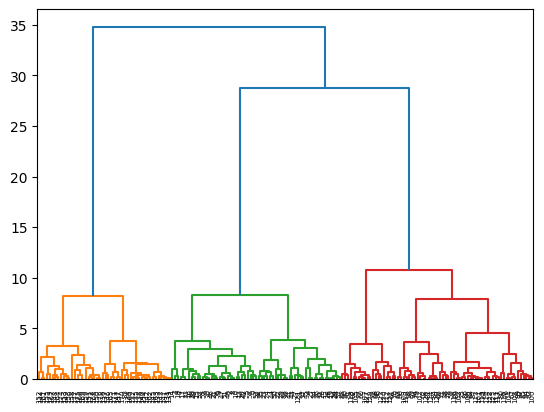

In [79]:
dendrograma = dendrogram(linkage(df2_pca, method = 'ward'))

In [80]:
from sklearn.cluster import AgglomerativeClustering

In [81]:
hier = AgglomerativeClustering(n_clusters=3, linkage = 'ward')
classificacao4 = hier.fit_predict(df2_pca)

In [82]:
classificacao4

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [83]:
import plotly.express as px

In [84]:
graf = px.scatter(x = df2_pca[:,0], y = df2_pca[:,1], color=classificacao4)
graf.update_layout(width=800,height=500,title_text='Agrupamento Hierárquico')
graf.show()

**Agrupamento**

In [85]:
agrupamento4 = pd.DataFrame(classificacao4, columns = ['Grupo'])
agrupamento4

,Grupo
0,2
1,2
2,2
3,2
4,2
...,...
173,1
174,1
175,1
176,1


In [86]:
df6 = pd.concat([df, agrupamento4],axis=1)
df6

,Álcool,Ácido málico,Cinzas,Alcalinidade das cinzas,Magnésio,Fenóis totais,Flavonoides,Fenóis não flavonoides,Proantocianidinas,Intensidade da cor,Matriz,OD280,Prolina,Grupo
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [316]:
grupo2 = df6.loc[df6.Grupo == 2]
grupo2.shape

(61, 14)

In [317]:
grupo2 = df6.loc[df6.Grupo == 1]
grupo2.shape

(48, 14)

In [318]:
grupo2 = df6.loc[df6.Grupo == 0]
grupo2.shape

(69, 14)

### **Algoritmo Hierárquico: todos atributos**

**Dendograma**

In [88]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

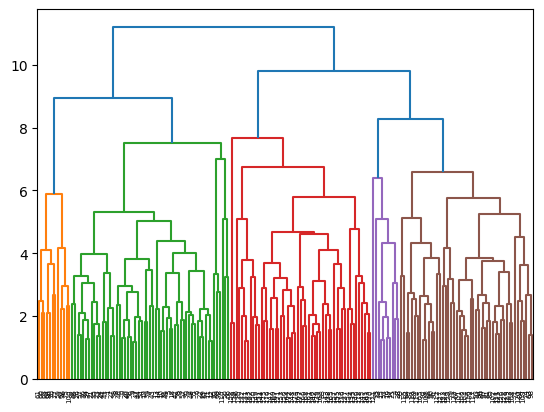

In [89]:
dendrograma = dendrogram(linkage(df2_esc, method = 'complete'))

In [90]:
from sklearn.cluster import AgglomerativeClustering

In [91]:
hier = AgglomerativeClustering(n_clusters=5, linkage = 'complete')
classificacao5 = hier.fit_predict(df2_esc)

In [92]:
classificacao5

array([1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 1, 1, 1, 1,
       1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 3, 3, 3, 3, 2, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 4, 2, 3, 3, 3, 1, 2, 2, 2, 2, 0, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

**Agrupamento**

In [93]:
agrupamento5 = pd.DataFrame(classificacao5, columns = ['Grupo'])
agrupamento5

,Grupo
0,1
1,1
2,1
3,1
4,4
...,...
173,0
174,0
175,0
176,0


In [94]:
df7 = pd.concat([df, agrupamento5],axis=1)
df7

,Álcool,Ácido málico,Cinzas,Alcalinidade das cinzas,Magnésio,Fenóis totais,Flavonoides,Fenóis não flavonoides,Proantocianidinas,Intensidade da cor,Matriz,OD280,Prolina,Grupo
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [95]:
grupo4 = df7.loc[df7.Grupo == 3]
grupo4.head(2)

,Álcool,Ácido málico,Cinzas,Alcalinidade das cinzas,Magnésio,Fenóis totais,Flavonoides,Fenóis não flavonoides,Proantocianidinas,Intensidade da cor,Matriz,OD280,Prolina,Grupo
59,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520,3
60,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680,3


In [96]:
grupo4.shape

(12, 14)

### **Algoritmo DBSCAN Com PCA**

**Componentes Principais**

In [97]:
from sklearn.decomposition import PCA

In [98]:
pca = PCA(n_components = 2)

In [99]:
df2_pca = pca.fit_transform(df2_esc)

In [101]:
df2_pca

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

In [100]:
from sklearn.cluster import DBSCAN

In [136]:
dbscan = DBSCAN(eps = 0.5, min_samples=5)
dbscan.fit(df2_pca)

DBSCAN()

In [137]:
classificacao6 = dbscan.labels_
classificacao6

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  2,  1,  1, -1, -1,  2,  0, -1,  2,
       -1,  0,  1,  0, -1,  0,  0,  2,  2,  1,  0, -1, -1,  0,  2,  3,  0,
        2,  2,  2,  1,  2,  1,  1,  1,  2,  2,  0, -1,  2,  0,  2,  2,  2,
       -1,  2,  2,  1,  2,  1,  2,  0,  0,  2,  1,  2,  2, -1,  2,  2, -1,
        2,  0,  0,  1, -1,  0,  2, -1,  1,  2,  1, -1,  3,  3,  3,  3,  3,
       -1,  3,  3,  3,  3,  3,  3,  3, -1,  3, -1,  3,  4,  4,  4,  4, -1,
        4,  3, -1,  4,  3, -1, -1,  3, -1,  3,  3,  4,  3,  4,  4,  4,  4,
       -1,  3,  4, -1,  4,  4,  4, -1], dtype=int64)

In [138]:
import plotly.express as px

In [139]:
graf = px.scatter(x = df2_pca[:,0], y = df2_pca[:,1], color=classificacao6)
graf.update_layout(width=800,height=500,title_text='Agrupamento DBSCAN')
graf.show()

**Agrupamento**

In [140]:
agrupamento6 = pd.DataFrame(classificacao6, columns = ['Grupo'])
agrupamento6

,Grupo
0,0
1,0
2,0
3,-1
4,0
...,...
173,-1
174,4
175,4
176,4


In [141]:
df8 = pd.concat([df, agrupamento6],axis=1)
df8

,Álcool,Ácido málico,Cinzas,Alcalinidade das cinzas,Magnésio,Fenóis totais,Flavonoides,Fenóis não flavonoides,Proantocianidinas,Intensidade da cor,Matriz,OD280,Prolina,Grupo
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,-1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,-1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,4
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,4
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,4


In [142]:
ruido = df8.loc[df8.Grupo == -1]
ruido

,Álcool,Ácido málico,Cinzas,Alcalinidade das cinzas,Magnésio,Fenóis totais,Flavonoides,Fenóis não flavonoides,Proantocianidinas,Intensidade da cor,Matriz,OD280,Prolina,Grupo
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,-1
14,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547,-1
18,14.19,1.59,2.48,16.5,108,3.30,3.93,0.32,1.86,8.70,1.23,2.82,1680,-1
43,13.24,3.98,2.29,17.5,103,2.64,2.63,0.32,1.66,4.36,0.82,3.00,680,-1
45,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080,-1
50,13.05,1.73,2.04,12.4,92,2.72,3.27,0.17,2.91,7.20,1.12,2.91,1150,-1
62,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630,-1
63,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420,-1
66,13.11,1.01,1.70,15.0,78,2.98,3.18,0.26,2.28,5.30,1.12,3.18,502,-1
68,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750,-1


In [143]:
ruido.shape

(31, 14)

### **Algoritmo DBSCAN: todos atributos**

In [144]:
from sklearn.cluster import DBSCAN

In [180]:
dbscan = DBSCAN(eps = 2.1, min_samples=4)
dbscan.fit(df2_esc)

DBSCAN(eps=2.1, min_samples=4)

In [181]:
classificacao7 = dbscan.labels_
classificacao7

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1, -1,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1,  0, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0, -1, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0, -1,  0,  0, -1,
       -1,  0, -1, -1, -1, -1,  0,  0, -1,  0, -1, -1,  1,  1,  1,  2,  2,
       -1, -1,  2,  1,  1,  1,  1,  2,  1,  1, -1,  2,  2,  2,  2,  2, -1,
        2,  2,  2,  2, -1, -1, -1,  2,  1,  1,  1,  2,  2,  2,  2,  2, -1,
        1,  2,  2,  2,  2,  2, -1, -1], dtype=int64)

**Agrupamento**

In [182]:
agrupamento7 = pd.DataFrame(classificacao7, columns = ['Grupo'])
agrupamento7

,Grupo
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,-1


In [183]:
df9 = pd.concat([df, agrupamento7],axis=1)
df9

,Álcool,Ácido málico,Cinzas,Alcalinidade das cinzas,Magnésio,Fenóis totais,Flavonoides,Fenóis não flavonoides,Proantocianidinas,Intensidade da cor,Matriz,OD280,Prolina,Grupo
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,-1


In [184]:
ruido = df9.loc[df9.Grupo == -1]
ruido

,Álcool,Ácido málico,Cinzas,Alcalinidade das cinzas,Magnésio,Fenóis totais,Flavonoides,Fenóis não flavonoides,Proantocianidinas,Intensidade da cor,Matriz,OD280,Prolina,Grupo
13,14.75,1.73,2.39,11.4,91,3.10,3.69,0.43,2.81,5.40,1.250,2.73,1150,-1
14,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.200,3.00,1547,-1
21,12.93,3.80,2.65,18.6,102,2.41,2.41,0.25,1.98,4.50,1.030,3.52,770,-1
25,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.130,3.20,830,-1
41,13.41,3.84,2.12,18.8,90,2.45,2.68,0.27,1.48,4.28,0.910,3.00,1035,-1
43,13.24,3.98,2.29,17.5,103,2.64,2.63,0.32,1.66,4.36,0.820,3.00,680,-1
45,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.870,3.33,1080,-1
46,14.38,3.59,2.28,16.0,102,3.25,3.17,0.27,2.19,4.90,1.040,3.44,1065,-1
50,13.05,1.73,2.04,12.4,92,2.72,3.27,0.17,2.91,7.20,1.120,2.91,1150,-1
59,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.050,1.82,520,-1


In [185]:
ruido.shape

(57, 14)

In [186]:
grupo = df9.loc[df9.Grupo == 1]
grupo.shape

(13, 14)

### **Algoritmo Meanshift Com PCA**

**Componentes Principais**

In [187]:
from sklearn.decomposition import PCA

In [188]:
pca = PCA(n_components = 2)

In [189]:
df2_pca = pca.fit_transform(df2_esc)

In [190]:
df2_pca

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

**MeanShift**

In [191]:
from sklearn.cluster import MeanShift

In [210]:
mean = MeanShift(bandwidth=2, cluster_all=True)

In [211]:
mean.fit(df2_pca)

MeanShift(bandwidth=2)

In [212]:
classificacao8 = mean.labels_
classificacao8

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [213]:
import plotly.express as px

In [214]:
graf = px.scatter(x = df2_pca[:,0], y = df2_pca[:,1], color=classificacao8)
graf.update_layout(width=800,height=500,title_text='Agrupamento MeanShift')
graf.show()

**Agrupamento**

In [215]:
agrupamento8 = pd.DataFrame(classificacao8, columns = ['Grupo'])
agrupamento8

,Grupo
0,1
1,1
2,1
3,1
4,1
...,...
173,2
174,2
175,2
176,2


In [216]:
df9 = pd.concat([df, agrupamento8],axis=1)
df9

,Álcool,Ácido málico,Cinzas,Alcalinidade das cinzas,Magnésio,Fenóis totais,Flavonoides,Fenóis não flavonoides,Proantocianidinas,Intensidade da cor,Matriz,OD280,Prolina,Grupo
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [313]:
zero = df9.loc[df9.Grupo == 0]
zero.shape

(70, 14)

In [314]:
zero = df9.loc[df9.Grupo == 1]
zero.shape

(54, 14)

In [315]:
zero = df9.loc[df9.Grupo == 2]
zero.shape

(54, 14)

### **Algoritmo Meanshift: todos atributos**

In [218]:
from sklearn.cluster import MeanShift

In [293]:
mean = MeanShift(bandwidth=3.7, cluster_all=True)

In [294]:
mean.fit(df2_esc)

MeanShift(bandwidth=3.7)

In [295]:
classificacao9 = mean.labels_
classificacao9

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 2, 1, 0, 0, 3, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 4, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

**Agrupamento**

In [296]:
agrupamento9 = pd.DataFrame(classificacao9, columns = ['Grupo'])
agrupamento9

,Grupo
0,0
1,0
2,0
3,0
4,0
...,...
173,1
174,1
175,1
176,1


In [297]:
df10 = pd.concat([df, agrupamento9],axis=1)
df10

,Álcool,Ácido málico,Cinzas,Alcalinidade das cinzas,Magnésio,Fenóis totais,Flavonoides,Fenóis não flavonoides,Proantocianidinas,Intensidade da cor,Matriz,OD280,Prolina,Grupo
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [299]:
grupo = df10.loc[df10.Grupo == 4]
grupo.shape

(2, 14)